<a href="https://colab.research.google.com/github/stephkariuki19/colab-notebooks/blob/main/CLASS_EXE_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd

# Replace 'your_file.csv' with the actual filename
df = pd.read_csv('new_filtered_data2.csv')


Saving new_filtered_data2.csv to new_filtered_data2 (1).csv


In [ ]:
 # view the loaded the data
df.head()

,Date,Code,Name,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjusted Price
0,3-Jan-22,KUKZ,Kakuzi Plc,355.0,427.00,385.0,385.0,385.00,385.00,-,-,-,-
1,3-Jan-22,WTK,Williamson Tea Kenya Plc,125.0,154.75,132.0,132.0,132.00,130.00,2,1.54%,"15,000",-
2,3-Jan-22,ABSA,ABSA Bank Kenya Plc,8.6,12.95,11.6,11.9,11.75,11.85,-0.1,0.84%,"57,700",-
3,3-Jan-22,BKG,BK Group Plc,24.3,40.00,29.0,29.0,29.00,29.00,-,-,-,-
4,3-Jan-22,EQTY,Equity Group Holdings Plc,39.0,55.00,51.0,54.5,52.75,52.75,-,-,"4,702,000",-


In [ ]:
num_rows = len(df)

print(f"The CSV file has {num_rows} rows.")

The CSV file has 2040 rows.


In [ ]:
unique_names = df['Name'].unique()

# Print or display the unique values
print(unique_names)


['Kakuzi Plc' 'Williamson Tea Kenya Plc' 'ABSA Bank Kenya Plc'
 'BK Group Plc' 'Equity Group Holdings Plc' 'KCB Group Plc'
 'National Bank of Kenya Ltd' 'Stanbic Holdings Plc'
 'Eveready East Africa Ltd' 'Express Kenya Plc'
 'Homeboyz Entertainment Plc' 'Kenya Airways Plc'
 'Longhorn Publishers Plc' 'Nairobi Business Ventures Ltd'
 'Nation Media Group Plc' 'Sameer Africa Plc' 'Standard Group Plc'
 'Bamburi Cement Ltd' 'Crown Paints Kenya Plc' 'East African Cables Ltd']


In [ ]:
# Create a mapping between string values and numerical codes
code_mapping = {code: idx for idx, code in enumerate(df['Code'].unique())}

# Map the string values to numerical codes
df['Code'] = df['Code'].map(code_mapping)
# Assuming 'df' is your DataFrame and 'Code' is the column of interest
largest_value = df['Code'].max()

print("The largest value in the 'Code' column is:", largest_value)
# Convert the 'date' column to a datetime object
df['date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')

# Extract relevant date features
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

# Optionally, you can add more features like day of the week or quarter
df['day_of_week'] = df['date'].dt.dayofweek  # Monday=0, Sunday=6
df['quarter'] = df['date'].dt.quarter

# Drop the original 'date' column
df = df.drop('Date', axis=1)

 # view the loaded the data
df.head()



The largest value in the 'Code' column is: 19


,Code,Name,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjusted Price,date,day,month,year,day_of_week,quarter
0,0,Kakuzi Plc,355.0,427.00,385.0,385.0,385.00,385.00,-,-,-,-,2022-01-03,3,1,2022,0,1
1,1,Williamson Tea Kenya Plc,125.0,154.75,132.0,132.0,132.00,130.00,2,1.54%,"15,000",-,2022-01-03,3,1,2022,0,1
2,2,ABSA Bank Kenya Plc,8.6,12.95,11.6,11.9,11.75,11.85,-0.1,0.84%,"57,700",-,2022-01-03,3,1,2022,0,1
3,3,BK Group Plc,24.3,40.00,29.0,29.0,29.00,29.00,-,-,-,-,2022-01-03,3,1,2022,0,1
4,4,Equity Group Holdings Plc,39.0,55.00,51.0,54.5,52.75,52.75,-,-,"4,702,000",-,2022-01-03,3,1,2022,0,1


In [ ]:
df = df.drop('date', axis=1)

 # view the loaded the data
df.head()

,Code,Name,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjusted Price,day,month,year,day_of_week,quarter
0,0,Kakuzi Plc,355.0,427.00,385.0,385.0,385.00,385.00,-,-,-,-,3,1,2022,0,1
1,1,Williamson Tea Kenya Plc,125.0,154.75,132.0,132.0,132.00,130.00,2,1.54%,"15,000",-,3,1,2022,0,1
2,2,ABSA Bank Kenya Plc,8.6,12.95,11.6,11.9,11.75,11.85,-0.1,0.84%,"57,700",-,3,1,2022,0,1
3,3,BK Group Plc,24.3,40.00,29.0,29.0,29.00,29.00,-,-,-,-,3,1,2022,0,1
4,4,Equity Group Holdings Plc,39.0,55.00,51.0,54.5,52.75,52.75,-,-,"4,702,000",-,3,1,2022,0,1


In [ ]:
columns_to_replace = ['Volume', 'Change', 'Change%']

# Remove '-' with 0 and remove commas in the specified columns
df[columns_to_replace] = df[columns_to_replace].replace('-', '0', regex=True)
df[columns_to_replace] = df[columns_to_replace].replace(',', '', regex=True)
df[columns_to_replace] = df[columns_to_replace].replace('%', '', regex=True)

# Convert the columns to numeric type
df[columns_to_replace] = df[columns_to_replace].astype(float)

# Check for any remaining non-numeric values in these columns
for col in columns_to_replace:
    non_numeric_values = df[col].loc[~df[col].apply(lambda x: isinstance(x, (int, float)))].unique()
    if non_numeric_values.size > 0:
        print(f"Non-numeric values in column '{col}': {non_numeric_values}")
df.head()

,Code,Name,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjusted Price,day,month,year,day_of_week,quarter
0,0,Kakuzi Plc,355.0,427.00,385.0,385.0,385.00,385.00,0.0,0.00,0.0,-,3,1,2022,0,1
1,1,Williamson Tea Kenya Plc,125.0,154.75,132.0,132.0,132.00,130.00,2.0,1.54,15000.0,-,3,1,2022,0,1
2,2,ABSA Bank Kenya Plc,8.6,12.95,11.6,11.9,11.75,11.85,0.1,0.84,57700.0,-,3,1,2022,0,1
3,3,BK Group Plc,24.3,40.00,29.0,29.0,29.00,29.00,0.0,0.00,0.0,-,3,1,2022,0,1
4,4,Equity Group Holdings Plc,39.0,55.00,51.0,54.5,52.75,52.75,0.0,0.00,4702000.0,-,3,1,2022,0,1


In [ ]:
# Print/display data for a specific company
zero_code_rows = df[df['Code'] == 5]

print(df.dtypes)


Code                int64
Name               object
12m Low           float64
12m High          float64
Day Low           float64
Day High          float64
Day Price         float64
Previous          float64
Change            float64
Change%           float64
Volume            float64
Adjusted Price     object
day                 int64
month               int64
year                int64
day_of_week         int64
quarter             int64
dtype: object


In [ ]:
#Putting Feature Variable to X and Target variable to y.
#feature variables

columns_to_drop = ['Day Price','Name','Adjusted Price','Change%']

init_X_feature = df.drop(columns=columns_to_drop, axis=1).values

# Target variable
init_y_target = df['Day Price'].values

# Filtering rows where 'Code' column equals 0
zero_code_rows = df[df['Code'] == 5]

# Creating X_feature and y_target from the filtered data
X_feature = zero_code_rows.drop(columns=columns_to_drop, axis=1).values
y_target = zero_code_rows['Day Price'].values


In [ ]:
zero_code_rows.head()
print (zero_code_rows.columns)


Index(['Code', 'Name', '12m Low', '12m High', 'Day Low', 'Day High',
       'Day Price', 'Previous', 'Change', 'Change%', 'Volume',
       'Adjusted Price', 'day', 'month', 'year', 'day_of_week', 'quarter'],
      dtype='object')


In [ ]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_feature, y_target, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((71, 13), (31, 13))

In [ ]:

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Adjust the number of trees
    'min_samples_leaf': [1, 2, 3]     # Adjust the min samples in leaf nodes
}

# Create RandomForestRegressor object
regressor = RandomForestRegressor(random_state=42, oob_score=True)

# Perform GridSearchCV with cross-validation and OOB scoring
grid_search = GridSearchCV(regressor, param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_regressor = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_regressor.predict(X_test)

# Evaluate the best model
score = best_regressor.score(X_test, y_test)
print("Best model R-squared score:", score)
print("Best parameters:", grid_search.best_params_)


Best model R-squared score: 0.9831316962026087
Best parameters: {'min_samples_leaf': 2, 'n_estimators': 200}


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt, seaborn as sns
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Calculate RMSE from MSE
r2 = r2_score(y_test, y_pred)

# Display the metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")


Mean Absolute Error (MAE): 0.2864210221454154
Mean Squared Error (MSE): 0.19821582203284197
Root Mean Squared Error (RMSE): 0.4452143551513607
R-squared (R2): 0.9831316962026087


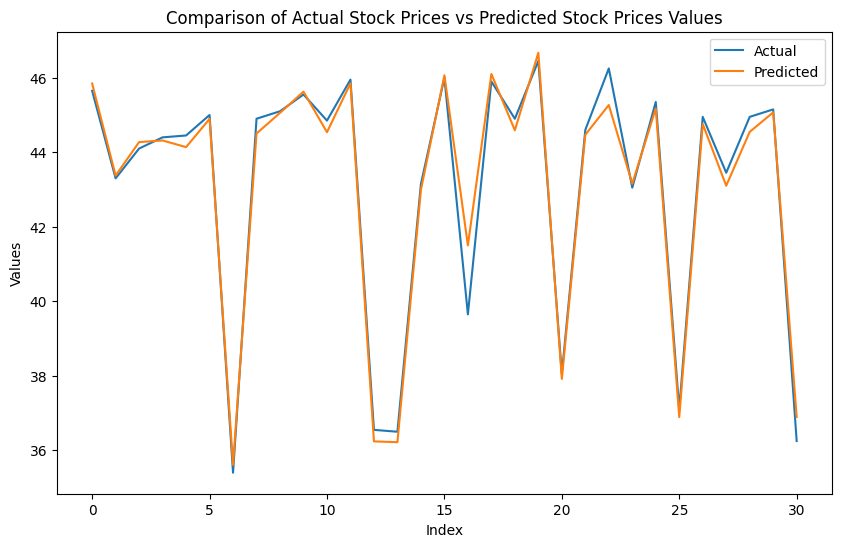

In [ ]:
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are arrays or Series with predictions and actual values respectively
# Create a range of indices or use the length of the arrays for plotting
indices = range(len(y_test))

# Plot y_test and y_pred
plt.figure(figsize=(10, 6))
plt.plot(indices, y_test, label='Actual')
plt.plot(indices, y_pred, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Comparison of Actual Stock Prices vs Predicted Stock Prices Values')
plt.legend()
plt.show()
